## Python Numerical PDEs Exercise

The equation is du/dt + a(du/dx) = 0 (One-way wave equation)

a : speed of propagation, u = u(x,t) where x : space variable, t : time variable, u0 = u(x,0) : initial condition.

#### Base parameters

In [1]:
import numpy as np

# parameters
lam = 0.6; dx = 0.1; dt = dx*lam; a=1;

# time, space and finite difference grid
t = np.arange(0,4+dt,dt); x=np.arange(-4,4+dx,dx); n = len(t); m = len(x); u = np.zeros((n,m)); u.shape

(68, 81)

#### Initial condition of u(x,t)

In [2]:
# initial grid
u0 = np.zeros((1,m));

# initial condition
for j in range(0,m):
    if (np.abs(x[j]) <= 1):
        u0[0,j]=1
    else:
        u0[0,j]=0

# assignment
u[0,:] = u0;

#### finite difference scheme : FTBS

du/dt == (v^n+1 - v^n)/dt, du/dx == (v_m - v_m-1)/dx, n L time step, m : space step.

Scheme : v^n+1 = v^n - lambda*(v_m - n_m-1) where lambda = a*(dt/dx).

In [3]:
for i in range(0,n-1):
    for j in range(1,m-1):
        u[i+1,j] = u[i,j] - lam*(u[i,j] - u[i,j-1])

#### Graph of u(x,t)

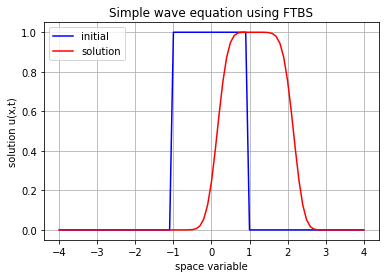

In [15]:
from matplotlib import pyplot as plt

plt.plot(x,u[0,:],color='b',label='initial');
plt.plot(x,u[20,:],color='r',label='solution');
plt.xlabel('space variable');
plt.ylabel('solution u(x,t)');
plt.title('Simple wave equation using FTBS');
plt.grid();
plt.legend(loc='upper left');
    